# Exercício 03 - Descida de gradiente e taxa de aprendizado

Aluno: Frederico Luis de Azevedo

Professor: Dr. Francisco de Assis Boldt

## Introdução

O exerício pede para plotar os gráficos da descida de gradiente de cada uma das bases analisadas. A classe SGDClassifier não expõe os valores `loss` de sua fase de treinamento enquanto está tentando chegar a uma otimização. É possível visualizar os valores de `loss` do treinamento durante cada iteração usando o argumento `verbose = 1`, mas não é possível ler estes valores históricos após a rede estar treinada (e jogar em um array para posterior análise, por exemplo).

Existe uma dúvida semelhante no [Stack Overflow](https://datascience.stackexchange.com/questions/28411/how-to-plot-cost-versus-number-of-iterations-in-scikit-learn) a respeito de obter estes valores, onde o método utilizado fala sobre fazer um parse do output do `verbose`, porém, ao custo de não ser performático e estar possivelmente lendo os valores errados.

Assim, os gráficos apresentados neste exercício foram plotados como "score" vs "número de iterações" para mostrar que nem sempre ter mais iterações (mais tentativas de otimização) fazem aumentar o score da classificação.

## Resultados Obtidos

Na maioria dos casos é possível notar o ponto mais alto de score é obtido com poucas iterações. Ou seja, sua otimização máxima foi atingida rapidamente. Com muitas iterações nota-se que a rede precisa de mais treinamento para chegar a um valor melhor de score. Pelos gráficos é possível perceber que com número de iterações superior a 1000, algumas redes tem condições de atingir o máximo score obtido com poucas iterações. Em outros casos, porém, mesmo com mais iterações de treinamento o score tende a ser mais baixo.

O alerta "ConvergenceWarning: Maximum number of iteration reached before convergence." apareceu em todos os treinamentos, independente do tamanho da base ou da função de custo. Isso significa que a rede atingiu sua melhor otimização antes mesmo de terminar a quantidade de iterações determinada pelo parâmetro `max_iter`, e que não adiantava mais continuar o processo.

## Bibliotecas e Inicialização

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

n_iters = [5, 10, 20, 50, 100, 1000]

In [2]:
def plot_graph(n_iters, scores):
    plt.xlabel("n iteracoes")
    plt.ylabel("score")
    plt.plot(n_iters, scores) 

## Bases de dados

Para este exercício serão construídas as seguintes bases de dados binárias:
- Base 1: 5000 registros
- Base 2: 10000 registros
- Base 3: 50000 registros

In [3]:
X1, Y1 = make_classification(n_samples=5000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)
X2, Y2 = make_classification(n_samples=10000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)
X3, Y3 = make_classification(n_samples=50000, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

## Classificador Utilizado

A tarefa será feita com o classificador SGDClassifier do pacote do scikit-learn com as seguintes funções de perda:
- hinge (SMV Linear)
- log (regressão logística)

As seguintes taxas de aprendizado serão utilizadas como parâmetro:
- 0.1
- 0.05
- 0.01

Em todos os classificadores, a taxa de treinamento foi mantida com o valor `constant`, ou seja, o valor da taxa informado na sua inicialização se manterá igual durante a fase de treinamento.

## Base 1: 5000 registros

### Loss: Hinge | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


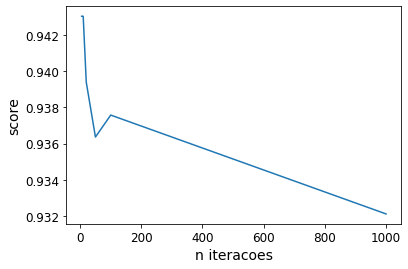

In [4]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: Hinge | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


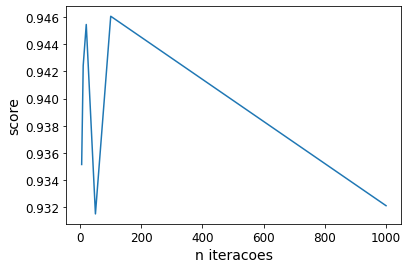

In [5]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: Hinge | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


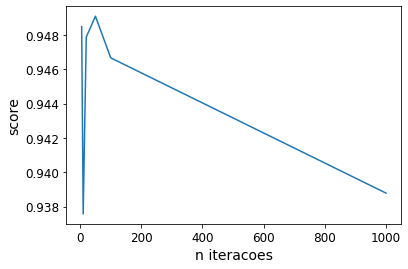

In [6]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


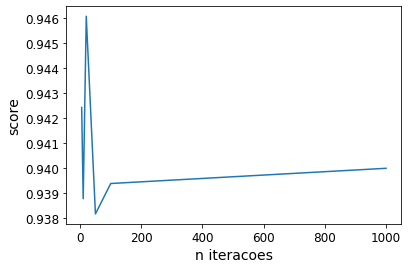

In [7]:
n_iters = [5, 10, 20, 50, 100, 1000]
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


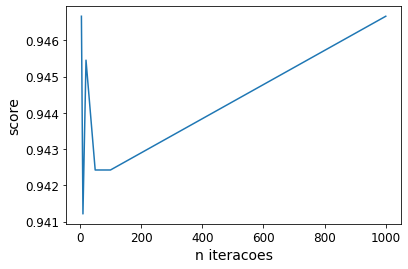

In [8]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


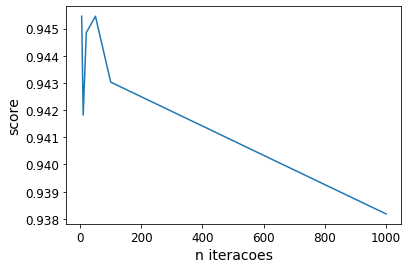

In [9]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

## Base 2: 10000 registros

### Loss: Hinge | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


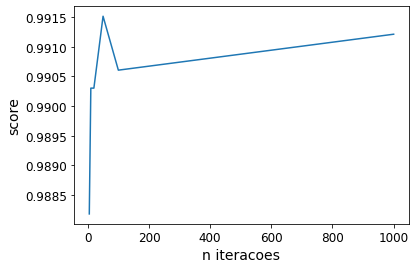

In [10]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: Hinge | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


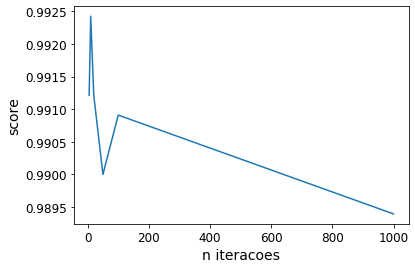

In [11]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: Hinge | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


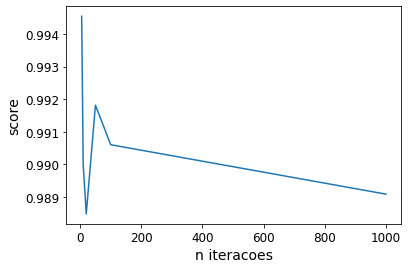

In [12]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


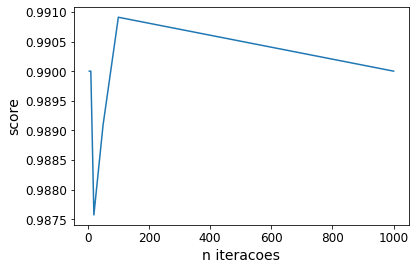

In [13]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


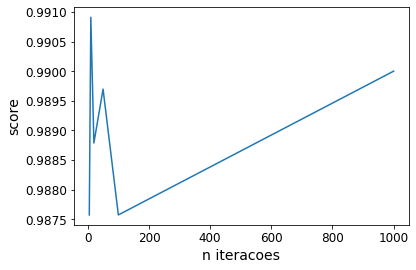

In [14]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


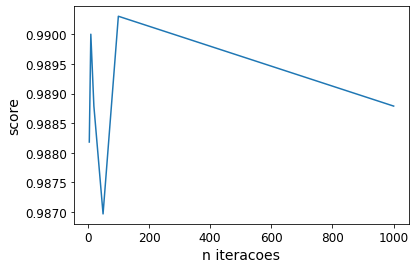

In [15]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X2, Y2, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

## Base 3: 50000 registros

### Loss: Hinge | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


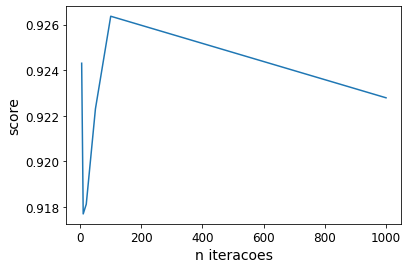

In [16]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: Hinge | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


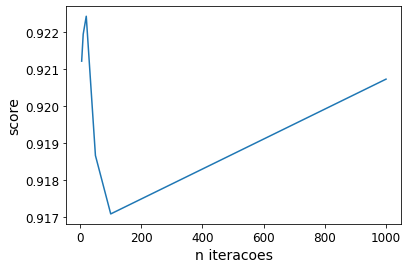

In [17]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: Hinge | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


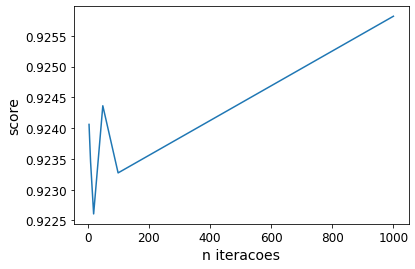

In [18]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    clf = SGDClassifier(loss="hinge", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.1

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


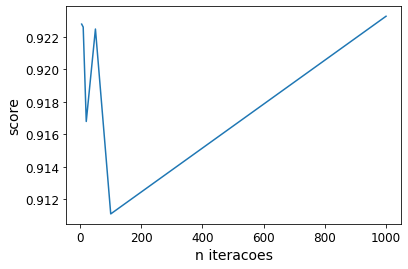

In [19]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.1)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.05

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


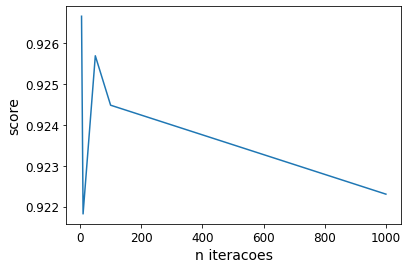

In [20]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.05)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 

### Loss: log | learning rate: 0.01

F:\Programas\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


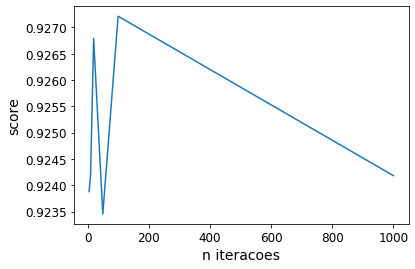

In [21]:
scores = []

for n_iter in n_iters:
    X_train, X_test, y_train, y_test = train_test_split(X3, Y3, test_size=0.33)
    clf = SGDClassifier(loss="log", max_iter=n_iter, learning_rate = 'constant', eta0= 0.01)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

plot_graph(n_iters, scores) 